In [7]:
import os
import torch
from torchvision import transforms

In [17]:
from model import MangaColorizer
from utils import ImageDataset, show_image, torch_to_pil

In [9]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = ImageDataset(dir="../data/train", transform=transform)
validation_dataset = ImageDataset(dir="../data/validation", transform=transform)
test_dataset = ImageDataset(dir="../data/test", transform=transform)

In [11]:
def load_model():
    model = MangaColorizer()
    model_file = "../model/best_model_checkpoint.pth"
    if os.path.exists(model_file):
        with open(model_file, "rb") as f:
            checkpoint = torch.load(f, map_location="cpu")
            model.load_state_dict(checkpoint)
    else:
        print(f"Error: {model_file} not found.")

    return model
model = load_model()

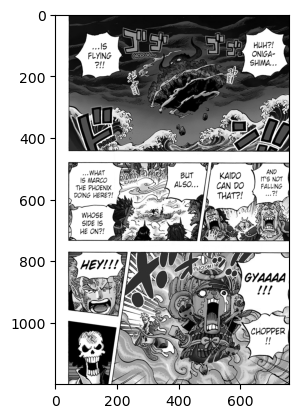

In [25]:
show_image(test_dataset[-7][0])

In [26]:
output = model(test_dataset[-7][0]).detach().cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


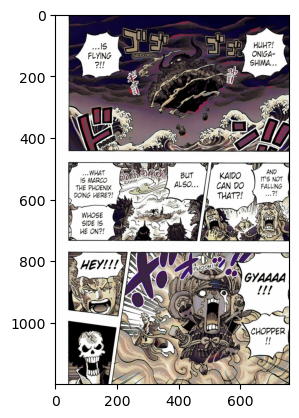

In [27]:
show_image(output)

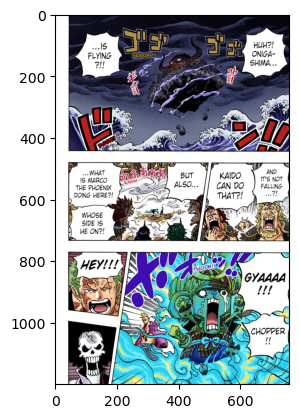

In [28]:
show_image(test_dataset[-7][1])